In [1]:
%load_ext rpy2.ipython

In [2]:
%%R 
library(tidyverse)
library(cowplot)
library(here)

R[write to console]: ── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

R[write to console]: ✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.2
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.4     ✔ forcats 1.0.0

R[write to console]: ── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

R[write to console]: here() starts at /workspaces/data_art



In [3]:
%%R -o titanic_data
titanic_data <- read_csv(here("data/titanic.csv"))

Rows: 887 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Name, Sex
dbl (6): Survived, Pclass, Age, Siblings/Spouses Aboard, Parents/Children Ab...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
titanic_data

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1      male  22.0                      1.0                      0.0   7.2500  
2    female  38.0                      1.0                      0.0  71.2833  
3    female  26.0                      0.0                      0.0   7.9250  
4    female  35.0                      1.0                      0.0  53.1000  
5      male  35.0                      0.0                      0.0   8.0500  
..      ...   ...                      ...                      ...      ...  
883    male  27.0                      0.0                      0.0  13.0000  
884  female  19.0                      0.0                      0.0  30.0000  
885  female   7.0                      1.0                      2.0  23.4500  
886    male  26.0                      0.0                      0.0  30.0000  
887    male  32.0                      0.0                      0.0   7.7500  

[887 rows x 8 columns]

I'll level with you here, I honestly though there were going to be more data columns... This is prety sparse..

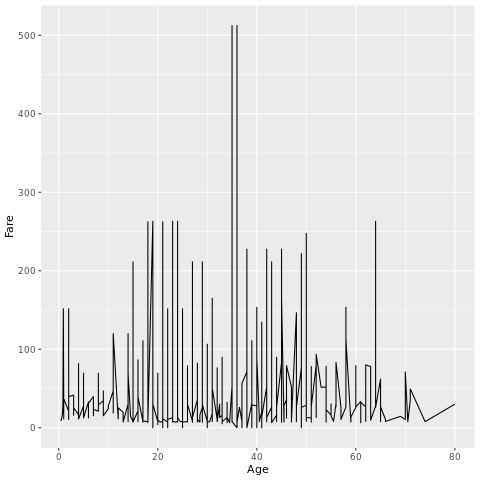

In [5]:
%%R 
titanic_data %>% 
	ggplot(aes(y = Fare, x = Age)) + 
		# geom_jitter() + 
		geom_line()

I mean that's a start.. WHoo, there really is going to be quite a bit of work to be done with this.

In [6]:
titanic_data

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
1      male  22.0                      1.0                      0.0   7.2500  
2    female  38.0                      1.0                      0.0  71.2833  
3    female  26.0                      0.0                      0.0   7.9250  
4    female  35.0                      1.0                      0.0  53.1000  
5      male  35.0                      0.0                      0.0   8.0500  
..      ...   ...                      ...                      ...      ...  
883    male  27.0                      0.0                      0.0  13.0000  
884  female  19.0                      0.0                      0.0  30.0000  
885  female   7.0                      1.0                      2.0  23.4500  
886    male  26.0                      0.0                      0.0  30.0000  
887    male  32.0                      0.0                      0.0   7.7500  

[887 rows x 8 columns]

In [7]:
titanic_data["row"] = range(titanic_data.shape[0])
titanic_data

Survived  Pclass                                               Name  \
1         0.0     3.0                             Mr. Owen Harris Braund   
2         1.0     1.0  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
3         1.0     3.0                              Miss. Laina Heikkinen   
4         1.0     1.0        Mrs. Jacques Heath (Lily May Peel) Futrelle   
5         0.0     3.0                            Mr. William Henry Allen   
..        ...     ...                                                ...   
883       0.0     2.0                               Rev. Juozas Montvila   
884       1.0     1.0                        Miss. Margaret Edith Graham   
885       0.0     3.0                     Miss. Catherine Helen Johnston   
886       1.0     1.0                               Mr. Karl Howell Behr   
887       0.0     3.0                                 Mr. Patrick Dooley   

        Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  \
1      male  22.0                      1.0                      0.0   7.2500   
2    female  38.0                      1.0                      0.0  71.2833   
3    female  26.0                      0.0                      0.0   7.9250   
4    female  35.0                      1.0                      0.0  53.1000   
5      male  35.0                      0.0                      0.0   8.0500   
..      ...   ...                      ...                      ...      ...   
883    male  27.0                      0.0                      0.0  13.0000   
884  female  19.0                      0.0                      0.0  30.0000   
885  female   7.0                      1.0                      2.0  23.4500   
886    male  26.0                      0.0                      0.0  30.0000   
887    male  32.0                      0.0                      0.0   7.7500   

     row  
1      0  
2      1  
3      2  
4      3  
5      4  
..   ...  
883  882  
884  883  
885  884  
886  885  
887  886  

[887 rows x 9 columns]

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


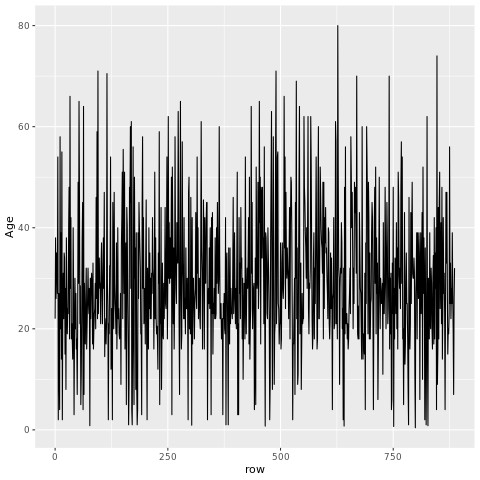

In [8]:
%%R -i titanic_data
titanic_data %>% 
	ggplot(aes(y = Age, x = row)) +
		geom_line()

/opt/conda/lib/python3.10/site-packages/rpy2/robjects/pandas2ri.py:54: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for name, values in obj.iteritems():


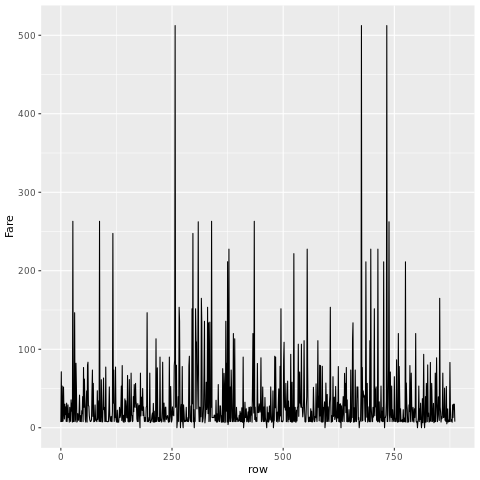

In [9]:
%%R -i titanic_data
titanic_data %>% 
	ggplot(aes(y = Fare, x = row)) +
		geom_line()

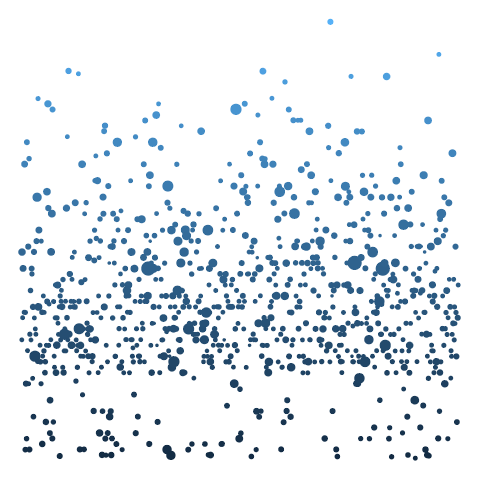

In [10]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		theme_nothing()

This is a bit interesting. It just shows the shape of the data! 

I think it would be nice to add in the row variable in R, so that I can play around with sorting and see how that makes it look.

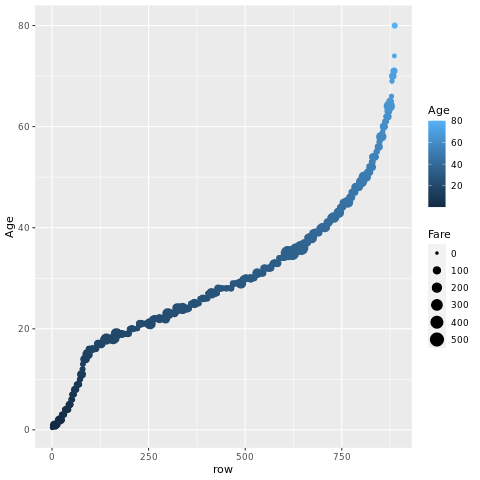

In [11]:
%%R 
titanic_data %>% 
	arrange(Age) %>%
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter()

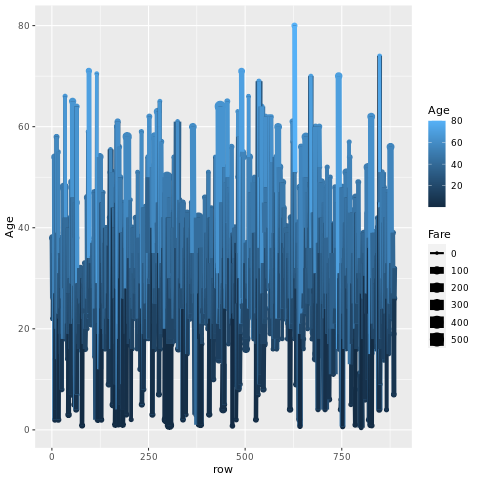

In [12]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line()

Alright this has some legs, we'll go with it!

# Plot 01


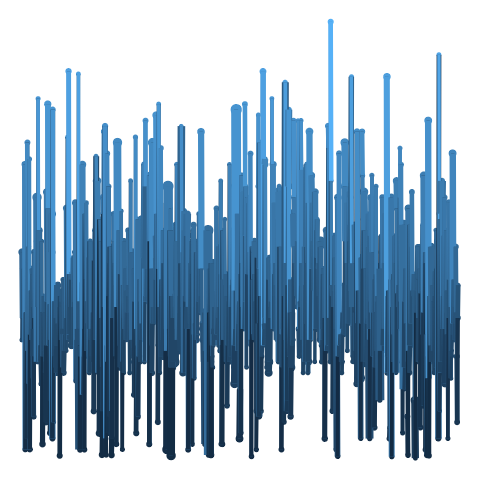

In [13]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		theme_nothing()

That already looks pretty cool. Maybe we can mess witht he colors?

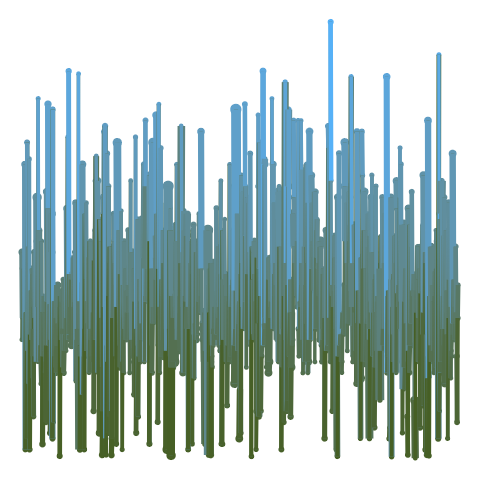

In [14]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#465F24") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

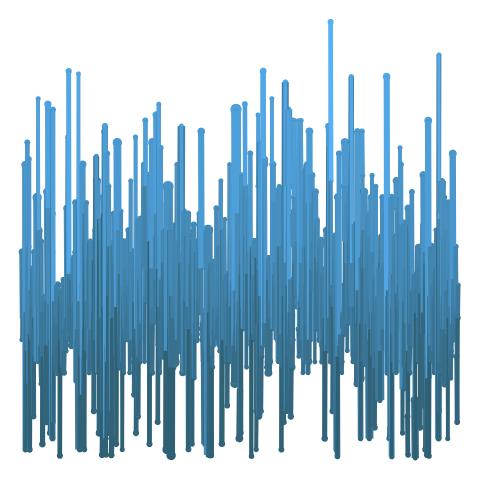

In [15]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#2F5F72") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

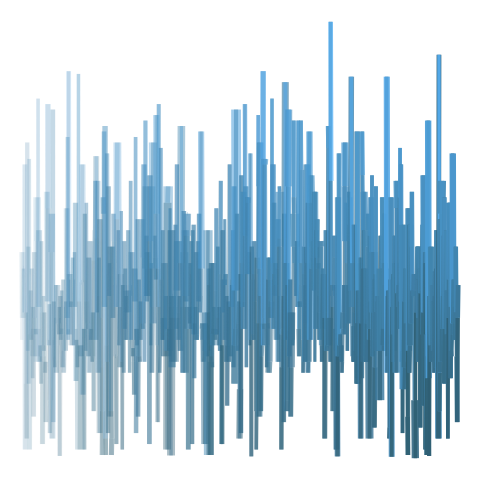

In [16]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		
		geom_line(aes(alpha = row)) +
		# geom_jitter() + 
		scale_colour_gradient(low = "#2F5F72") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

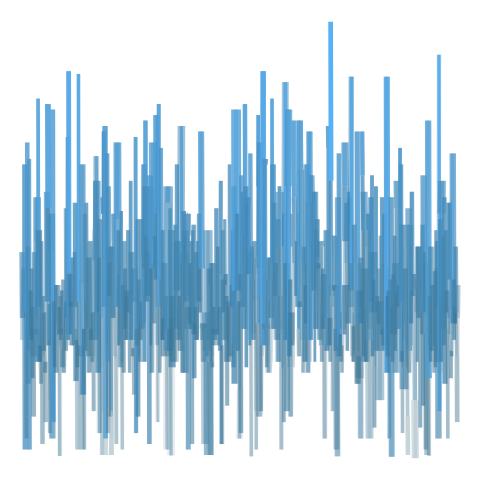

In [17]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		
		geom_line(aes(alpha = Age)) +
		# geom_jitter() + 
		scale_colour_gradient(low = "#2F5F72") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

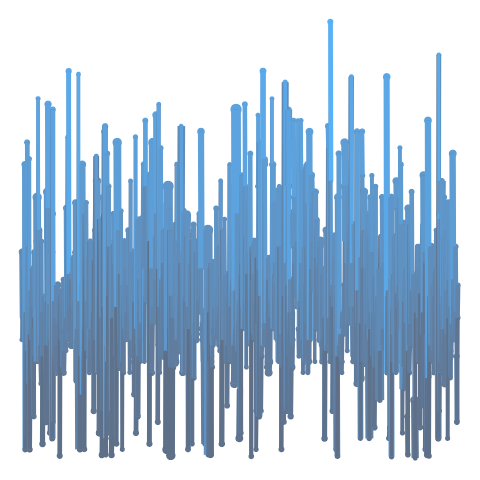

In [18]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#5E6F87") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

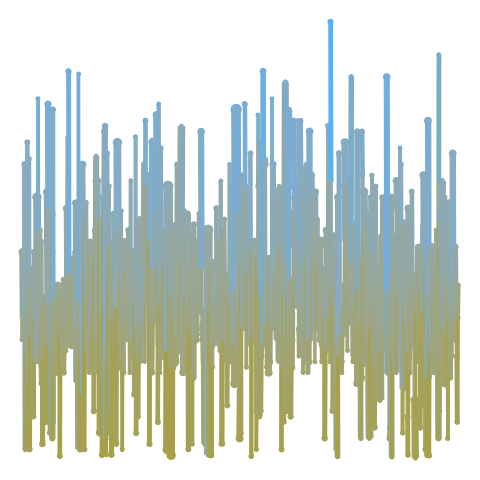

In [19]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#A6A04A") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

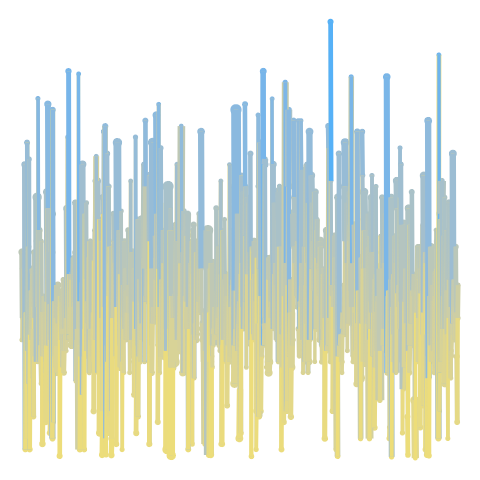

In [20]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, size = Fare, col = Age)) +
		geom_jitter() + 
		geom_line() +
		scale_colour_gradient(low = "#EDDD79") +
		# low = "#132B43") +
		# high = "#132B43") +
		theme_nothing()

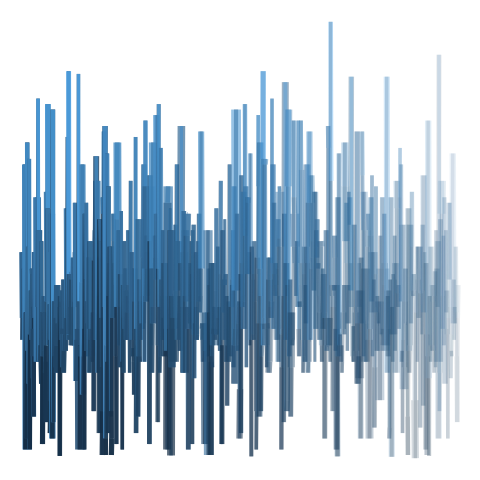

In [21]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot() +
		geom_line(aes(y = Age, x = row, size = Fare, col = Age, alpha = length(row) - row)) +
		# scale_fill_gradient(low = "red", high="blue") +
		theme_nothing()

## different geoms


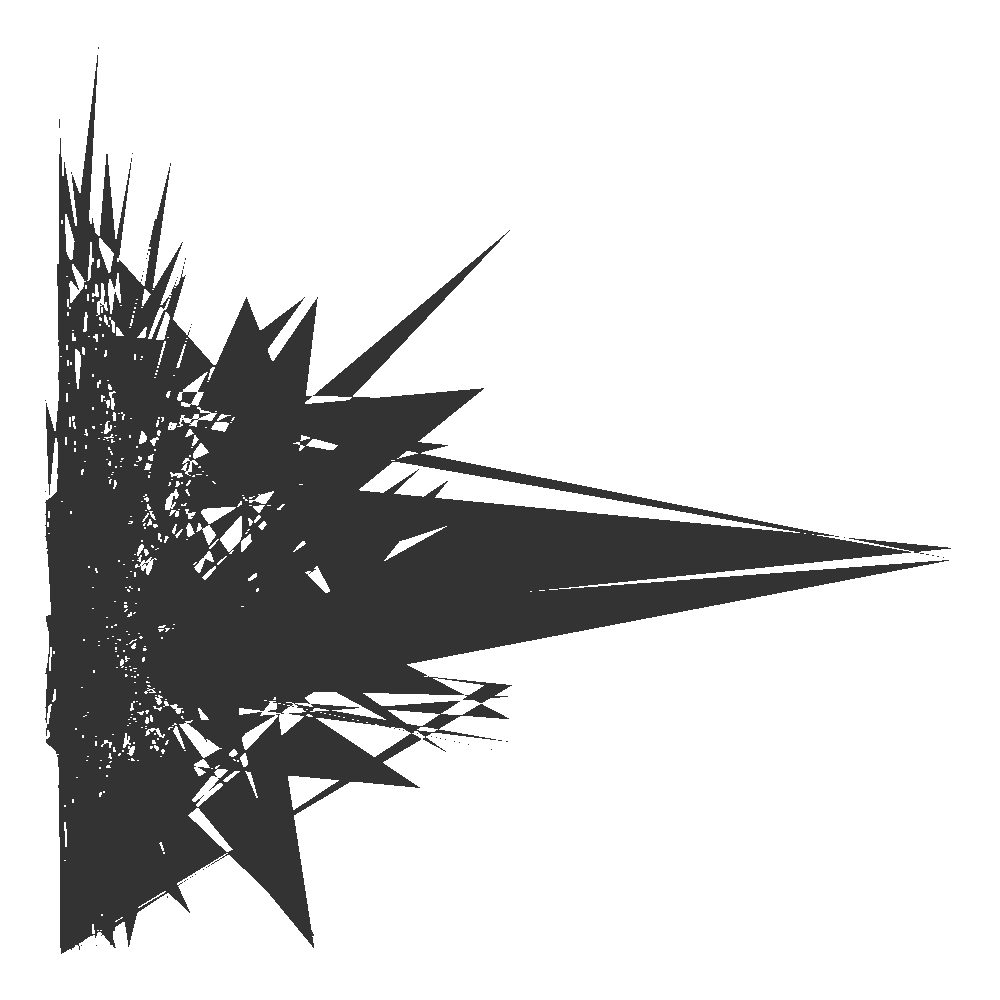

In [24]:
%%R -w 1000 -h 1000
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = Fare,
	 	# size = Fare, 
		# fill = row
		)) +
		geom_polygon() + 
		# scale_fill_gradient(low = "red", high="blue") +

		theme_nothing()

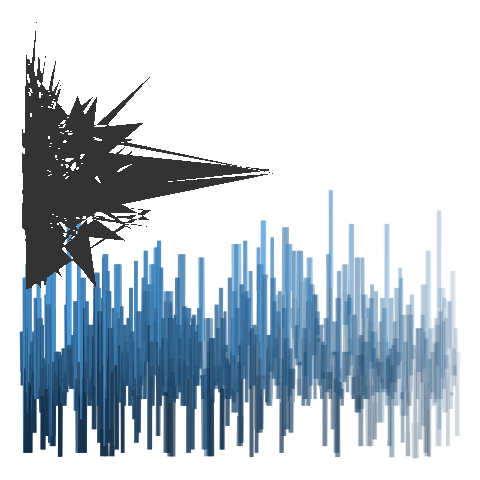

In [22]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot() +
		geom_line(aes(y = Age, x = row, size = Fare, col = Age, alpha = length(row) - row)) +
		geom_polygon(aes(y = Age+50, x = Fare)) + 
		# scale_fill_gradient(low = "red", high="blue") +
		theme_nothing()

Wow, I really like that!

## geom_spoke

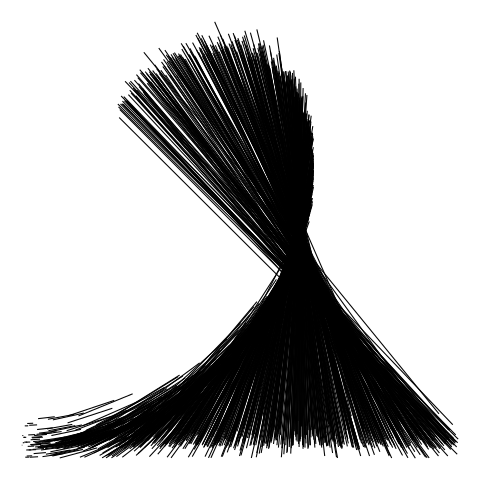

In [23]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (row/360),
			radius = row)
		) +
		theme_nothing()


Now we're on to something!

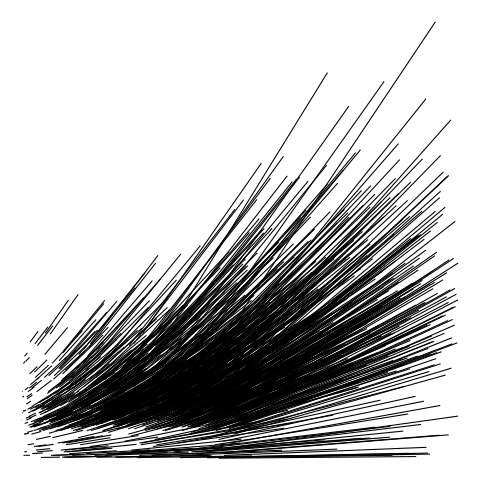

In [24]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row)
		) +
		theme_nothing()


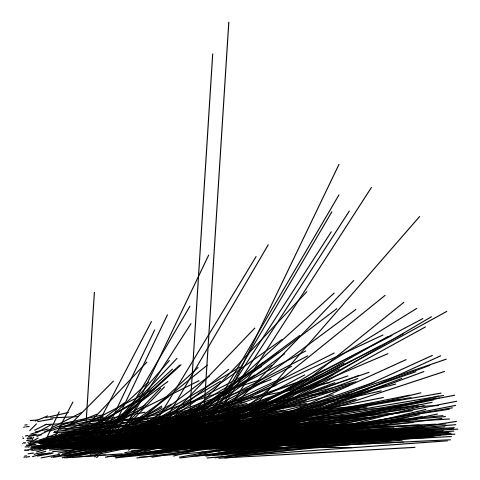

In [25]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Fare/360),
			radius = row)
		) +
		theme_nothing()


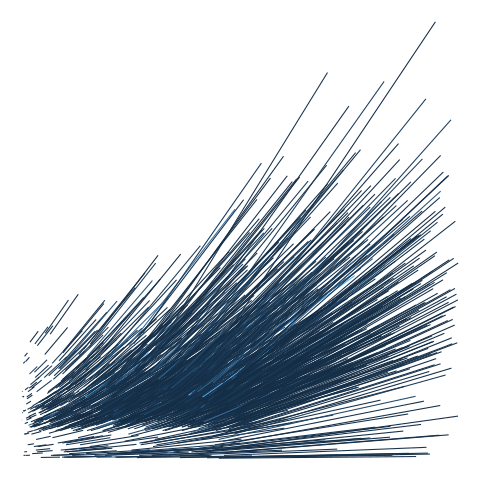

In [26]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Fare
			)
		) +
		theme_nothing()


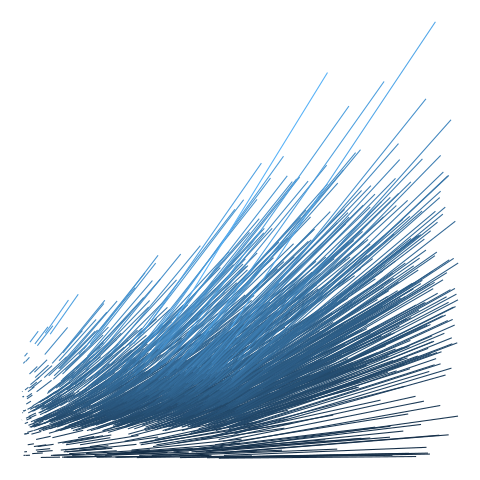

In [27]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age
			)
		) +
		theme_nothing()


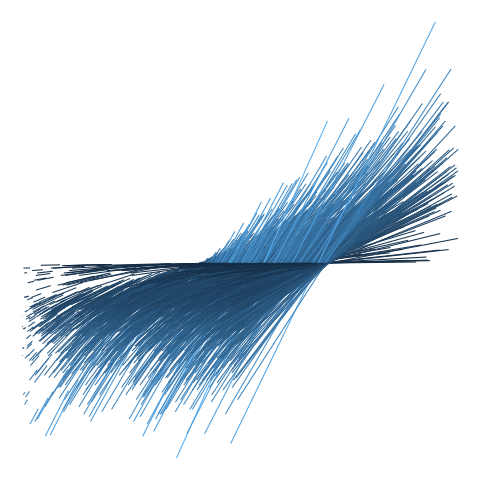

In [28]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age
			)
		) +
		theme_nothing()


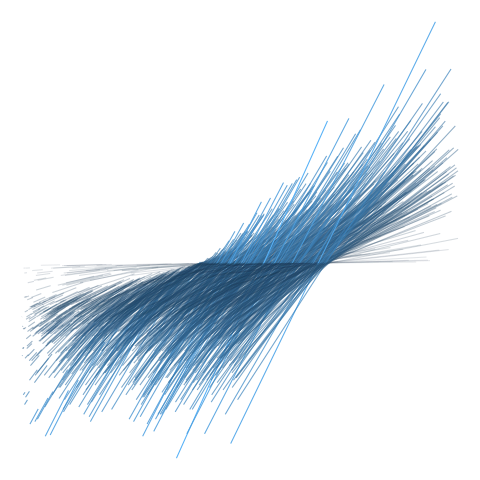

In [29]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age,
			alpha = Age
			)
		) +
		theme_nothing()


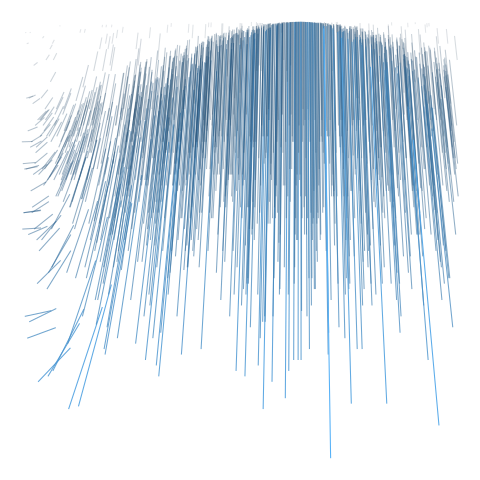

In [30]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (row/360),
			radius = Age,
			col = Age,
			alpha = Age
			)
		) +
		theme_nothing()


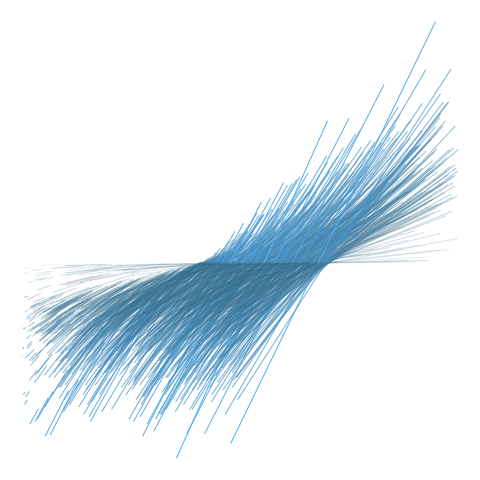

In [31]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = -Age, x = row)) +
		# geom_point() +
		geom_spoke(aes(
			angle = (Age/360),
			radius = row,
			col = Age,
			alpha = Age
			)
		) +
		scale_color_gradient( low = "#2F5F72" ) +
		theme_nothing()


Well this is really nice!

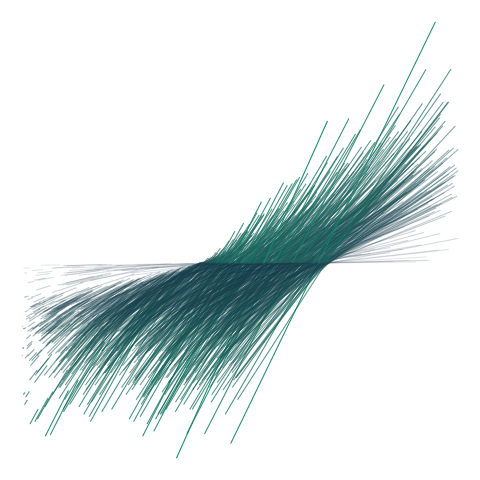

In [32]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot() +
		# geom_point() +
		geom_spoke(aes(
			y = -Age, x = row,
			angle = (Age/360),
			radius = row,
			col = Age,
			alpha = Age,
			inherit = FALSE
			)
		) +
		scale_color_gradient( high = "#118B6C" ) +
		theme_nothing()


So I've already identified some pretty cool things to work with here! I think what I'd like to do is a similar thing as before and make a 2x2 panel, so just pick out the 4 best plots and put them together. I think I'm well on my way!

Maybe I'll experiment with a few more geoms??

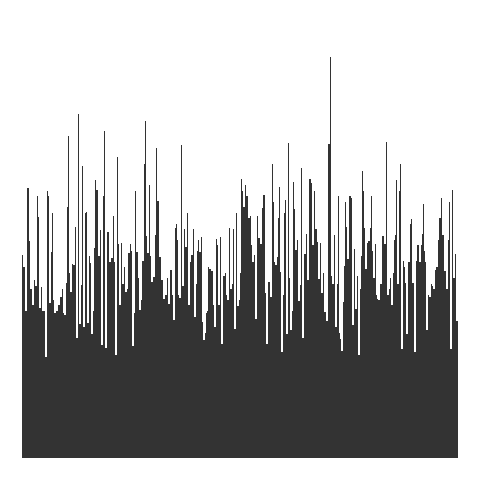

In [33]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row)) +
		geom_area() +
		theme_nothing()


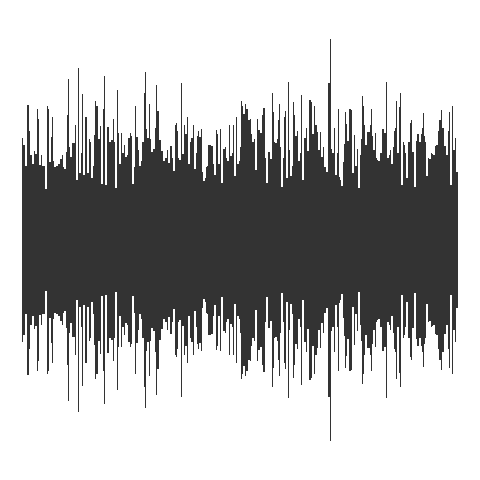

In [34]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = -Age, x = row)) +
		geom_area(aes(y = Age, x = row)) +
		theme_nothing()


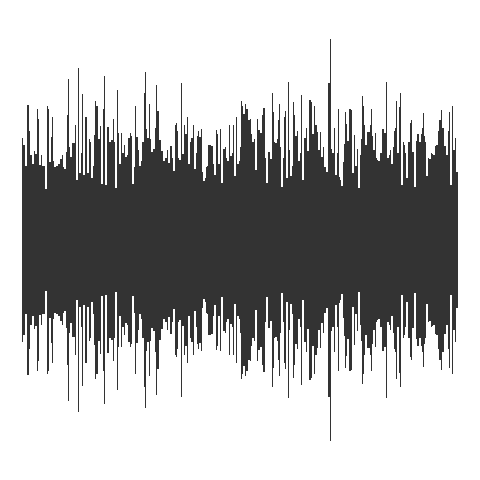

In [35]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = -Age, x = row)) +
		geom_area(aes(y = Age, x = row)) +
		theme_nothing()


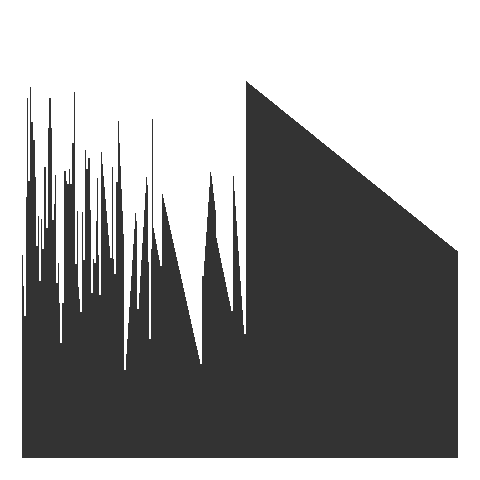

In [36]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = Age, x = Fare)) +
		theme_nothing()


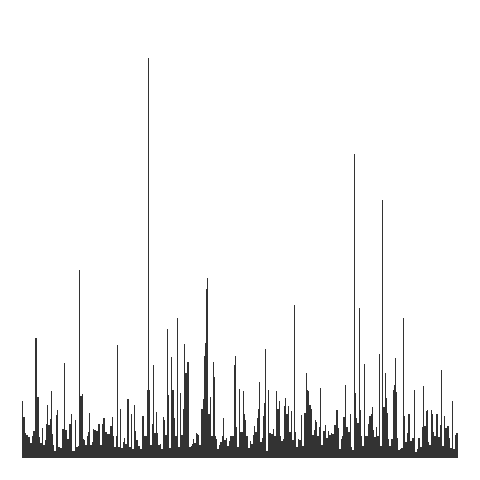

In [37]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	arrange(Fare) %>%
	ggplot() +
		geom_area(aes(y = Fare, x = row)) +
		theme_nothing()


I mean that didn't get as exciting as I would have hoped..

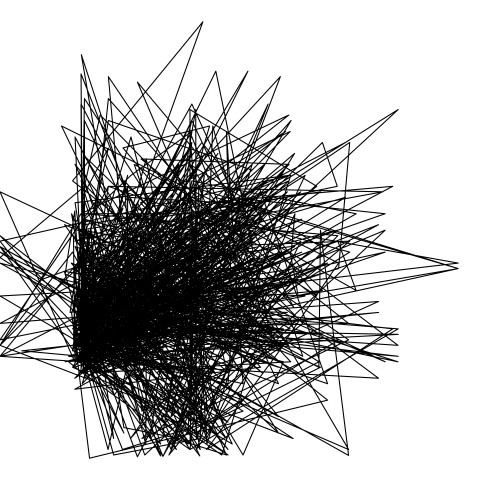

In [38]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path() +
		theme_nothing()


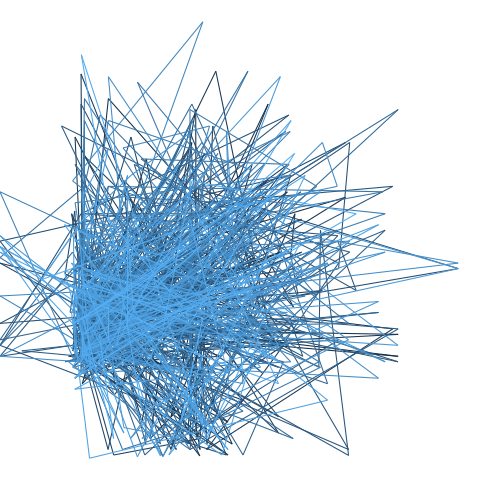

In [39]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = row)) +
		theme_nothing()


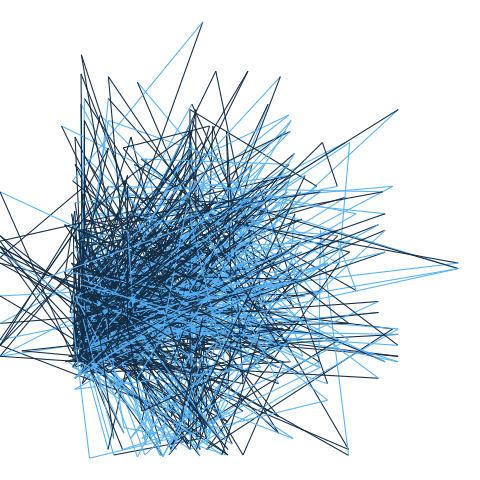

In [40]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = Survived)) +
		theme_nothing()


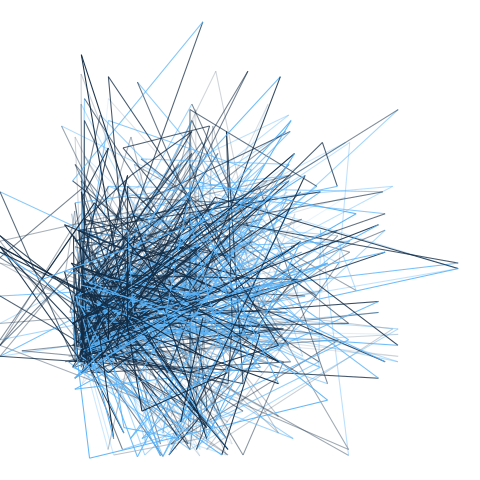

In [41]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = Survived, alpha = row)) +
		theme_nothing()


Honestly, I quite like this..

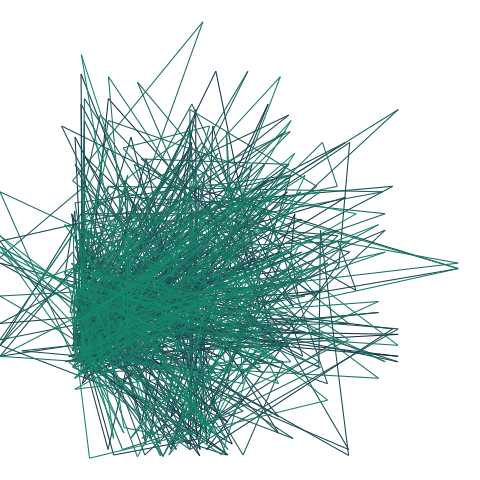

In [42]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = log(Fare))) +
		geom_path(aes(col = row)) +
		scale_color_gradient( high = "#118B6C" ) +
		theme_nothing()


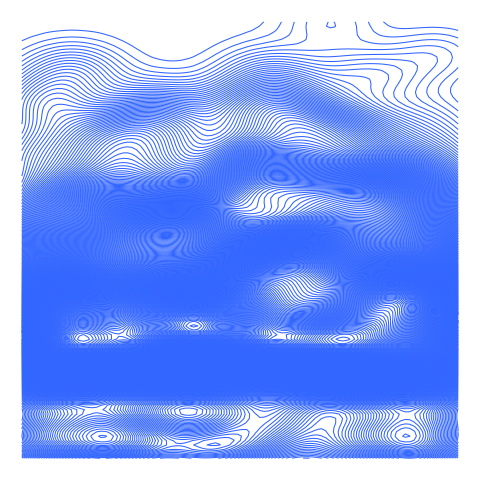

In [43]:
%%R 
titanic_data %>% 
	mutate(row = 1:n()) %>%
	ggplot(aes(y = Age, x = row, col = row)) +
		geom_density_2d(bins = 300) +
		# geom_contour_filled() +
		theme_nothing()
		


Hmm, maybe not for this particular dataset